# Pipeline for testing the input/crop/resize of pictures

In [1]:
import os

import torch
from PIL import Image, ImageStat, ImageChops
import matplotlib.pyplot as plt
import numpy as np

In [16]:
cwd = os.getcwd()
print(cwd)
cwd = os.path.normpath(os.getcwd() + os.sep + os.pardir)+'/data/2011_09_28'
print(cwd)

/home/ewok261/Documents/psychic-gan/code
/home/ewok261/Documents/psychic-gan/data/2011_09_28


In [29]:
all_trials = sorted([os.path.join(cwd, name) for name in os.listdir(cwd) if os.path.isdir(os.path.join(cwd, name))])
all_trials = [trial+'/image_02/data' for trial in all_trials]
#print(all_trials)
all_frames = [len(os.listdir(imagedir)) for imagedir in all_trials]
print(all_frames)
overlap = 2
block = 5
all_lens = [(nframes-overlap)//(block-overlap) for nframes in all_frames]
print(all_lens)

[68, 45, 74, 39, 29, 67, 39, 43, 70, 42, 37, 40, 75, 30, 82, 38, 46, 86, 41, 45, 44, 77, 46, 38, 44, 75, 48, 63, 74, 36, 77, 46, 43, 59, 32, 29, 73, 55, 42, 31, 68, 71, 32, 36, 71, 46, 90, 43, 48, 30, 41, 37, 38, 83, 39, 54, 57, 28, 54, 78, 43, 39, 86, 80, 41, 55, 38, 85, 39, 63, 35, 83, 51, 35, 54, 86, 42, 59, 78, 54, 14]
[22, 14, 24, 12, 9, 21, 12, 13, 22, 13, 11, 12, 24, 9, 26, 12, 14, 28, 13, 14, 14, 25, 14, 12, 14, 24, 15, 20, 24, 11, 25, 14, 13, 19, 10, 9, 23, 17, 13, 9, 22, 23, 10, 11, 23, 14, 29, 13, 15, 9, 13, 11, 12, 27, 12, 17, 18, 8, 17, 25, 13, 12, 28, 26, 13, 17, 12, 27, 12, 20, 11, 27, 16, 11, 17, 28, 13, 19, 25, 17, 4]


In [59]:
imfolder = '/home/ewok261/Documents/psychic-gan/data/2011_09_28/2011_09_28_drive_0053_sync/image_02/data/'
allfiles = sorted([f for f in os.listdir(imfolder)])
#print(allfiles)

In [60]:
imlist = []
imDiff = []
for imfile in allfiles:
    im = Image.open(imfolder+imfile)
    if imlist:
        imDiff.append(ImageChops.difference(imlist[-1],im))
    imlist.append(im)
print(len(imlist),len(imDiff))
print(imlist[5].format, imlist[5].size, imlist[5].mode)
#imlist[5].show()

68 67
PNG (1224, 370) RGB


In [61]:
dif = ImageChops.difference(imlist[5],imlist[4])
print(dif.size, dif.mode)
#dif.show()

stat_dif = ImageStat.Stat(dif).mean
print(stat_dif)

(1224, 370) RGB
[2.7263712241653417, 2.1593115173997526, 3.072151563328034]


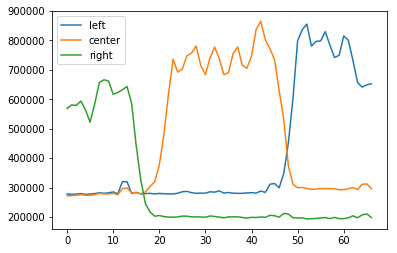

In [62]:
boxes = [(0,0,370,370),(400,0,770,370),(854,0,1224,370)] # change these hardcoded values
imstats = [[],[],[]]
for imdif in imDiff:
    im_crop0 = imdif.crop(boxes[0])
    stat0 = ImageStat.Stat(im_crop0).sum
    im_crop1 = imdif.crop(boxes[1])
    stat1 = ImageStat.Stat(im_crop1).sum
    im_crop2 = imdif.crop(boxes[2])
    stat2 = ImageStat.Stat(im_crop2).sum
    imstats[0].append(np.mean(stat0))
    imstats[1].append(np.mean(stat1))
    imstats[2].append(np.mean(stat2))
plt.plot(np.array(imstats).transpose())
plt.legend(['left','center','right'])

In [29]:
im_resize = im_crop.resize((64,64))
im_resize.show()